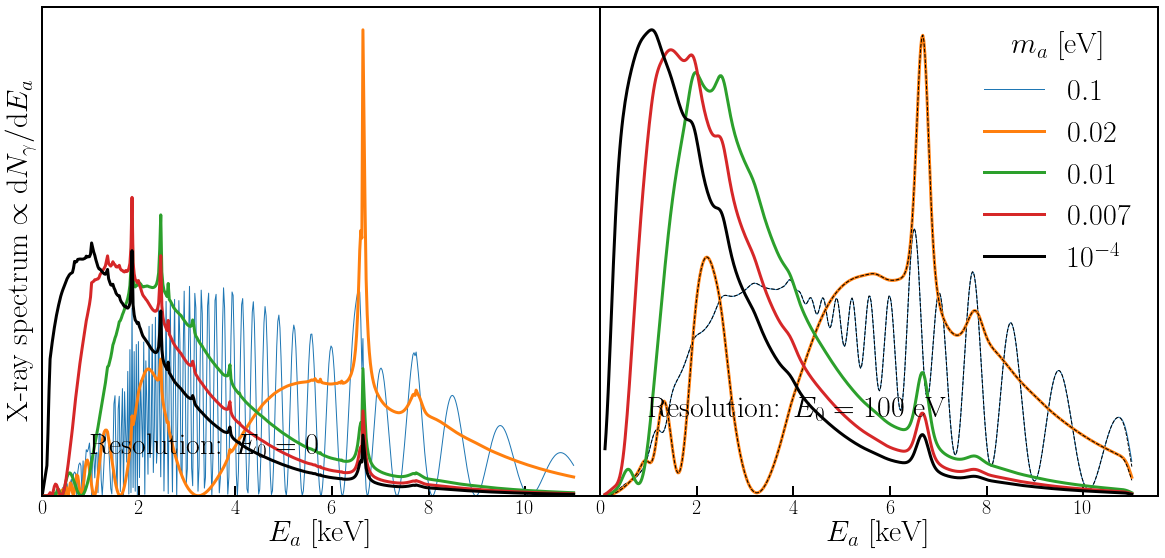

In [1]:
from numpy import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from AxionFuncs import PhotonNumber_Electron,AxionFlux_AxioRecomb, smear, smearFast

# init plot
plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(20,9))
gs = gridspec.GridSpec(1, 2, wspace=0.0)


ax = fig.add_subplot(gs[0])


na = 500
Ea = linspace(0.01,11,na)

Flux = AxionFlux_AxioRecomb(1e-10,Ea)

F = PhotonNumber_Electron(Flux,Ea,0.1)
plt.plot(Ea,F/sum(F),linewidth=1,label=r'$0.1$')

F = PhotonNumber_Electron(Flux,Ea,0.02)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.02$')

F = PhotonNumber_Electron(Flux,Ea,0.01)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.01$')

F = PhotonNumber_Electron(Flux,Ea,0.007)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.007$')

F = PhotonNumber_Electron(Flux,Ea,1e-4)
plt.plot(Ea,F/sum(F),'k',linewidth=3,label=r'$10^{-4}$')

# Plot fiddling
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.tick_params(which='major',direction='in',width=2,length=10)
ax.tick_params(which='minor',direction='in',width=1,length=7)
plt.xticks(fontsize=20)
plt.xlabel(r"$E_a$ [keV]",fontsize=30)
plt.yticks([], [])
plt.ylabel(r"X-ray spectrum $\propto {\rm d}N_\gamma/{\rm d}E_a$",fontsize=30);
plt.text(1,0.0012,r'Resolution: $E_0 = 0$',fontsize=30)







ax = fig.add_subplot(gs[1])

Eres = 100e-3
Ea = linspace(Eres,11,na)

F = smear(PhotonNumber_Electron(Flux,Ea,0.1),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=1,label=r'$0.1$')

F = smearFast(PhotonNumber_Electron(Flux,Ea,0.1),Ea,Eres)
plt.plot(Ea,F/sum(F),'k--',linewidth=1)

F = smear(PhotonNumber_Electron(Flux,Ea,0.02),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.02$')

F = smearFast(PhotonNumber_Electron(Flux,Ea,0.02),Ea,Eres)
plt.plot(Ea,F/sum(F),'k--',linewidth=1)

F = smear(PhotonNumber_Electron(Flux,Ea,0.01),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.01$')

F = smear(PhotonNumber_Electron(Flux,Ea,0.007),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.007$')

F = smear(PhotonNumber_Electron(Flux,Ea,1e-4),Ea,Eres)
plt.plot(Ea,F/sum(F),'k',linewidth=3,label=r'$10^{-4}$')

# Plot fiddling
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.tick_params(which='major',direction='in',width=2,length=10)
ax.tick_params(which='minor',direction='in',width=1,length=7)
plt.xticks(fontsize=20)
plt.xlabel(r"$E_a$ [keV]",fontsize=30)
plt.yticks([], [])
#plt.ylabel(r"X-ray spectrum $\propto {\rm d}N_\gamma/{\rm d}E_a$",fontsize=30);
leg = plt.legend(fontsize=30,frameon=False,title=r'$m_a$ [eV]')
plt.setp(leg.get_title(),fontsize=30)
plt.text(1,0.0012,r'Resolution: $E_0 = 100$ eV',fontsize=30)




plt.show()
fig.savefig('../plots/XraySpectra.pdf',bbox_inches='tight')


In [2]:
from numpy import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz, quad
from iminuit import minimize
from scipy.special import gammaln
import AxionFuncs
import Like
import time


# Generate Tabulated spectra
dN = AxionFuncs.AxionFlux_AxioRecomb
nm = 10
m_vals = logspace(-4.0,2e0,nm)
E_max = 10.0
nE_bins = 200

E_min = 1.0e-3


t0 = time.time()
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable_Electron(m_vals,E_min,E_max,nE_bins,nfine=10,res_on=True) 
t1 = time.time()
print 'time elapsed', t1-t0


time elapsed 0.735671043396
